In [34]:
import pandas as pd

На самом деле, все выполняется в одном датафрейме `df`. Каждый файл, который запускается с помощью `%run`, работает все с тем же `df`. Иногда мы можем сделать его копию для того, чтобы провести какие-нибудь расчеты, которые не должны изменять основной датафрейм.

Каждый писал свою часть, поэтому организовать работу в одной файле было бы досточно сложно и не обязательно более читаемо. 

Это так называемая модульная архитектура: каждый файл, или же модуль, выполняет определенный функции над последней версией датафрейма в основном запускаемом файле `main.ipynb` и передает его дальше. При этом, каждый модyль работает независимо от других, но все же порядок выполнения важен. 

## EDA

**Вот как мы решили поступить:**

EDA состоит из предобработки данных, то есть, нам нужно удалить дубликаты, обработать выбросы и заменить пропуски.

+ Для начала мы обрабатываем выбросы.
+ Затем мы решили использовать регрессионное моделирование для более точного предсказания пропусков. Так как файл с регрессионной моделью выполняется достаточно долго, мы обработали выбросы, сделали замену пропусков, а затем экпортировали получившийся `DataFrame` в файл `data_imputed_stage4gas_unfilled.csv`. Так мы сможем тестировать весь последующий код и нам не нужно ждать выполнения файла с предобработкой.
+ Файл, из которого мы экпортируем `DataFrame` находиться в `EDA/replacement_nan_values_except_stage4gas.ipynb`. В папке `EDA` также есть файл `remove_outliers_run.ipynb`, его использует файл `replacement_nan_values_except_stage4gas.ipynb`.
+ Так как файл `EDA/replacement_nan_values_except_stage4gas.ipynb` лишний раз лучше не запускать, чтобы долго не ждать, мы решили засунуть его в отдельный файл, а не в `main.ipynb`. Поэтому весь процесс можно посмотреть там. 

Поэтому тут мы просто получаем `df` из экпортированного файла.

In [35]:
df = pd.read_csv('data_imputed_stage4gas_unfilled.csv', sep=",")

## Расчеты

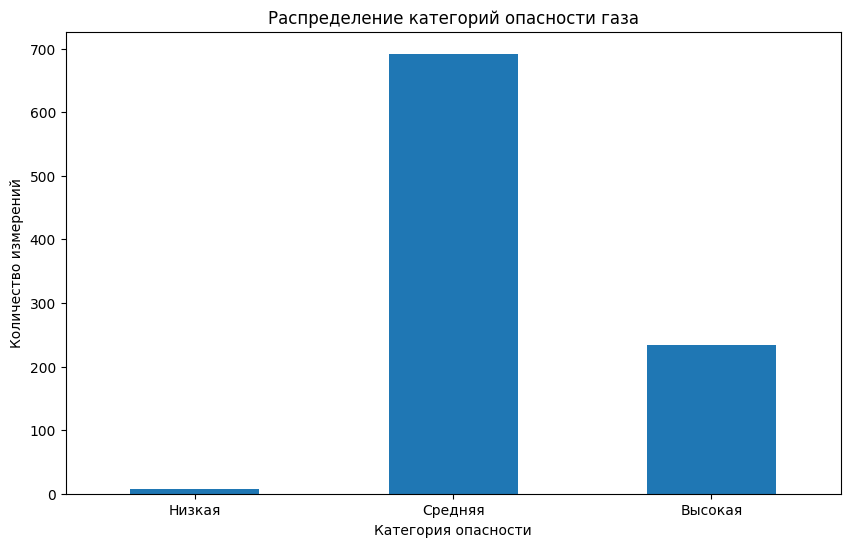

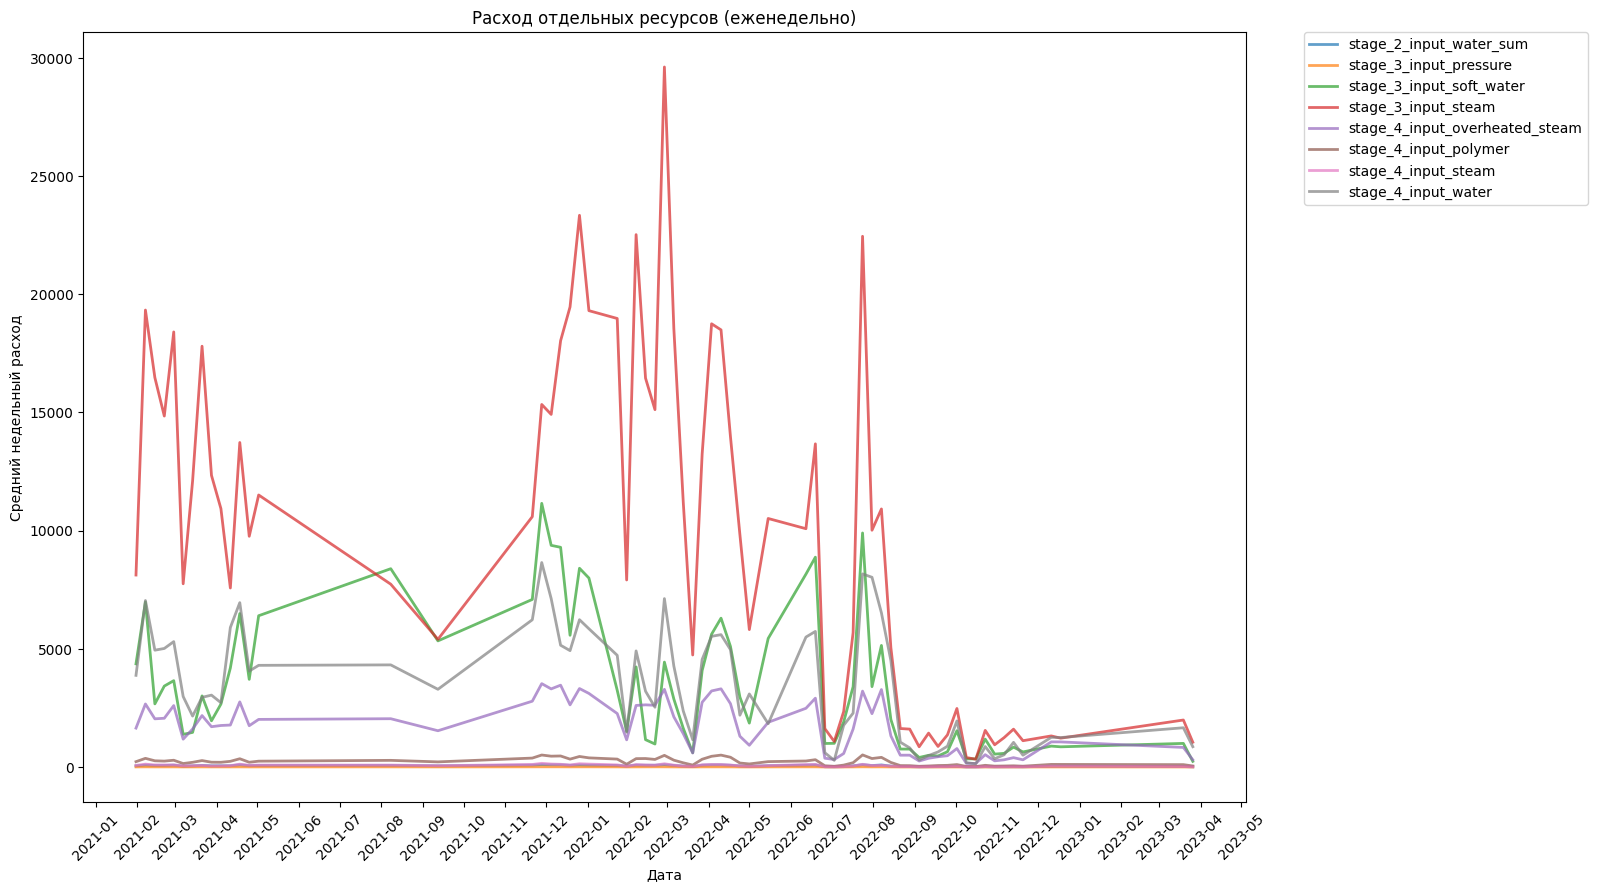

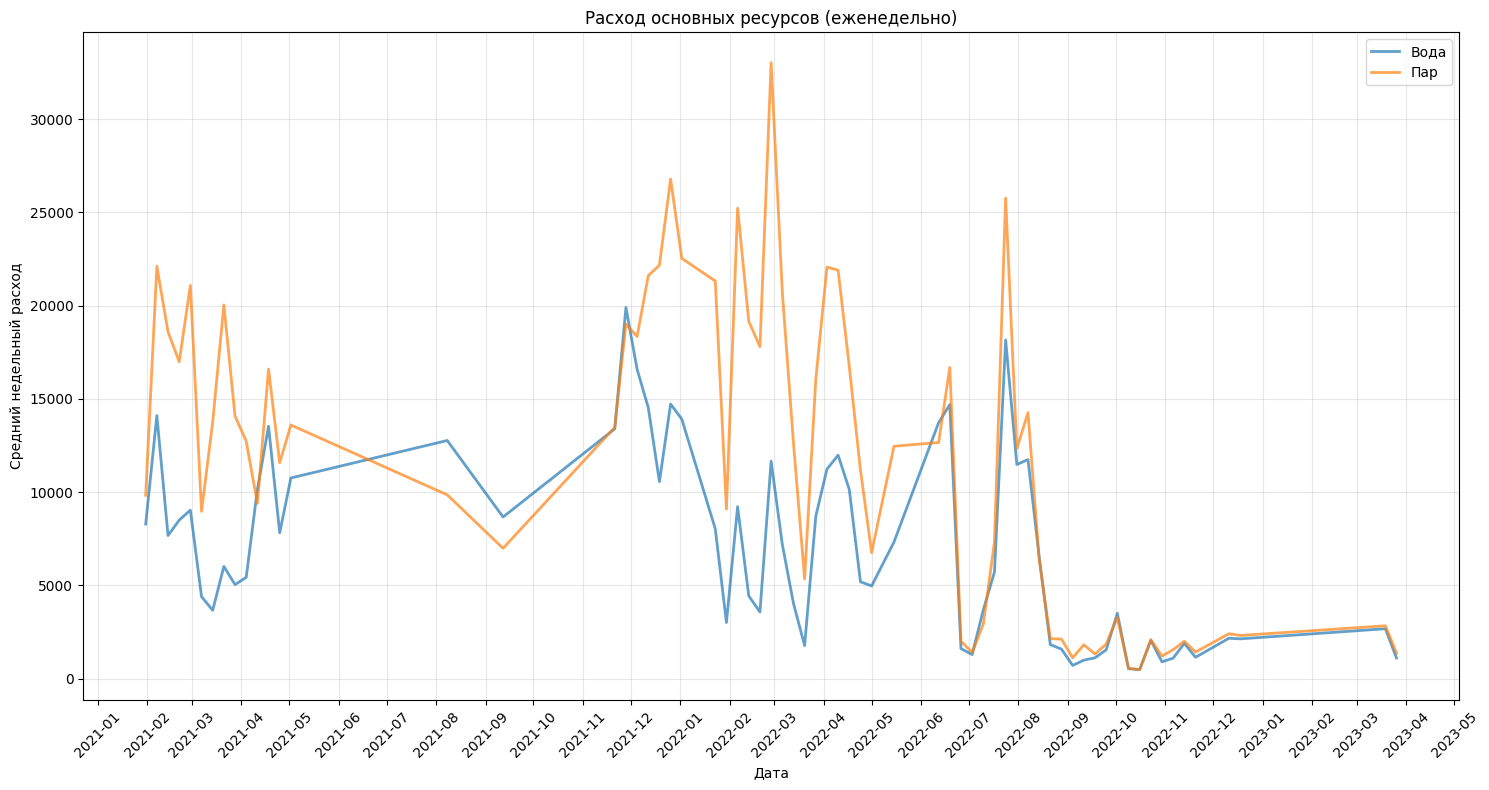


статистика расхода по стадиям:
          stage_2       stage_3       stage_4
count  371.000000    371.000000    371.000000
mean    50.445694  13589.425884   5610.748912
std     39.125875  11935.001289   4608.872774
min      3.706474    312.180000    293.720000
25%      9.240332   1810.640000    868.426913
50%     50.281667  11701.120000   5193.070000
75%     91.869837  24036.705000   9657.839687
max    125.566045  48131.424500  17356.433450
ГРАФИКИ ЕЖЕНЕДЕЛЬНОГО ПОТРЕБЛЕНИЯ


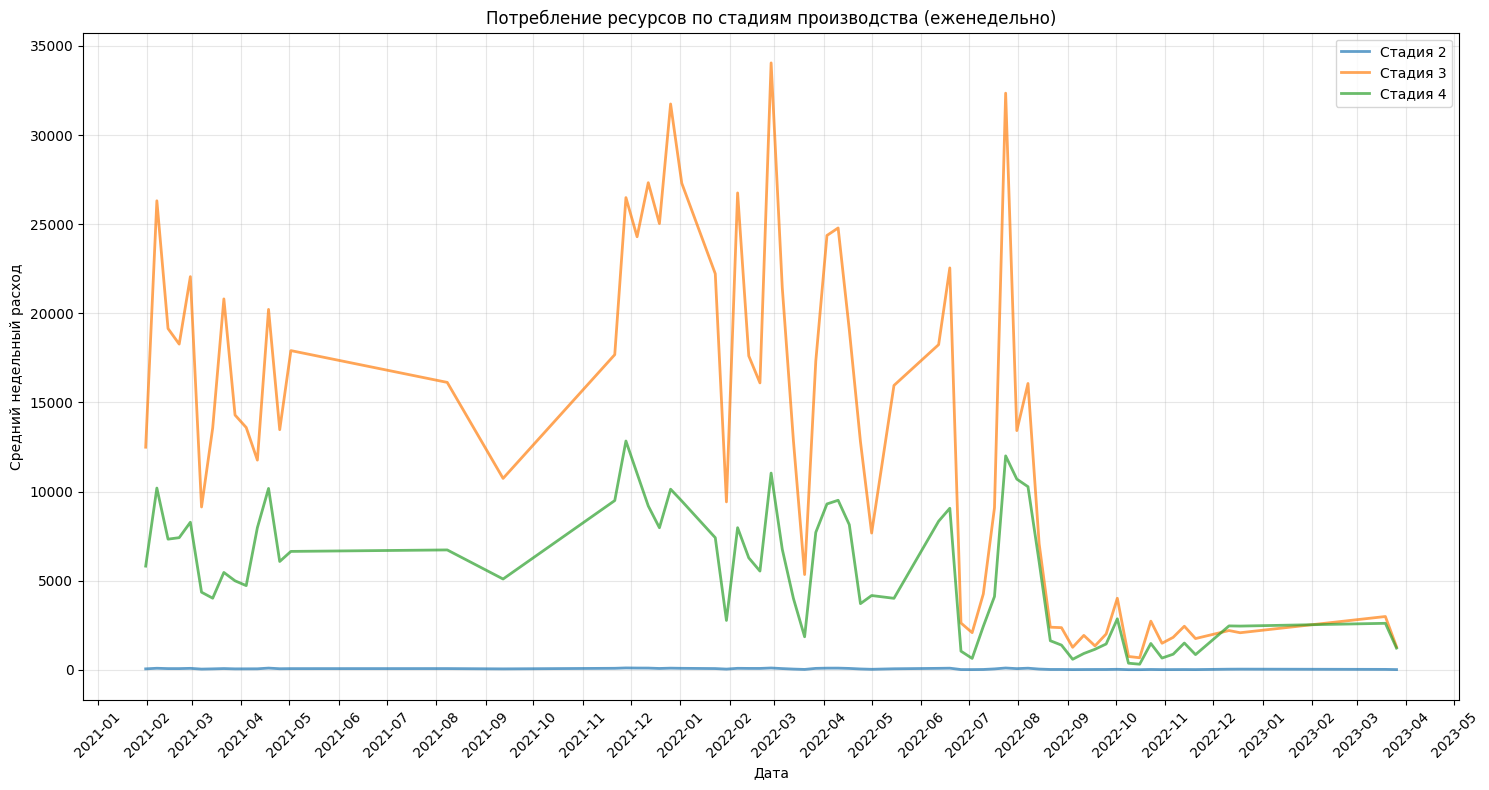

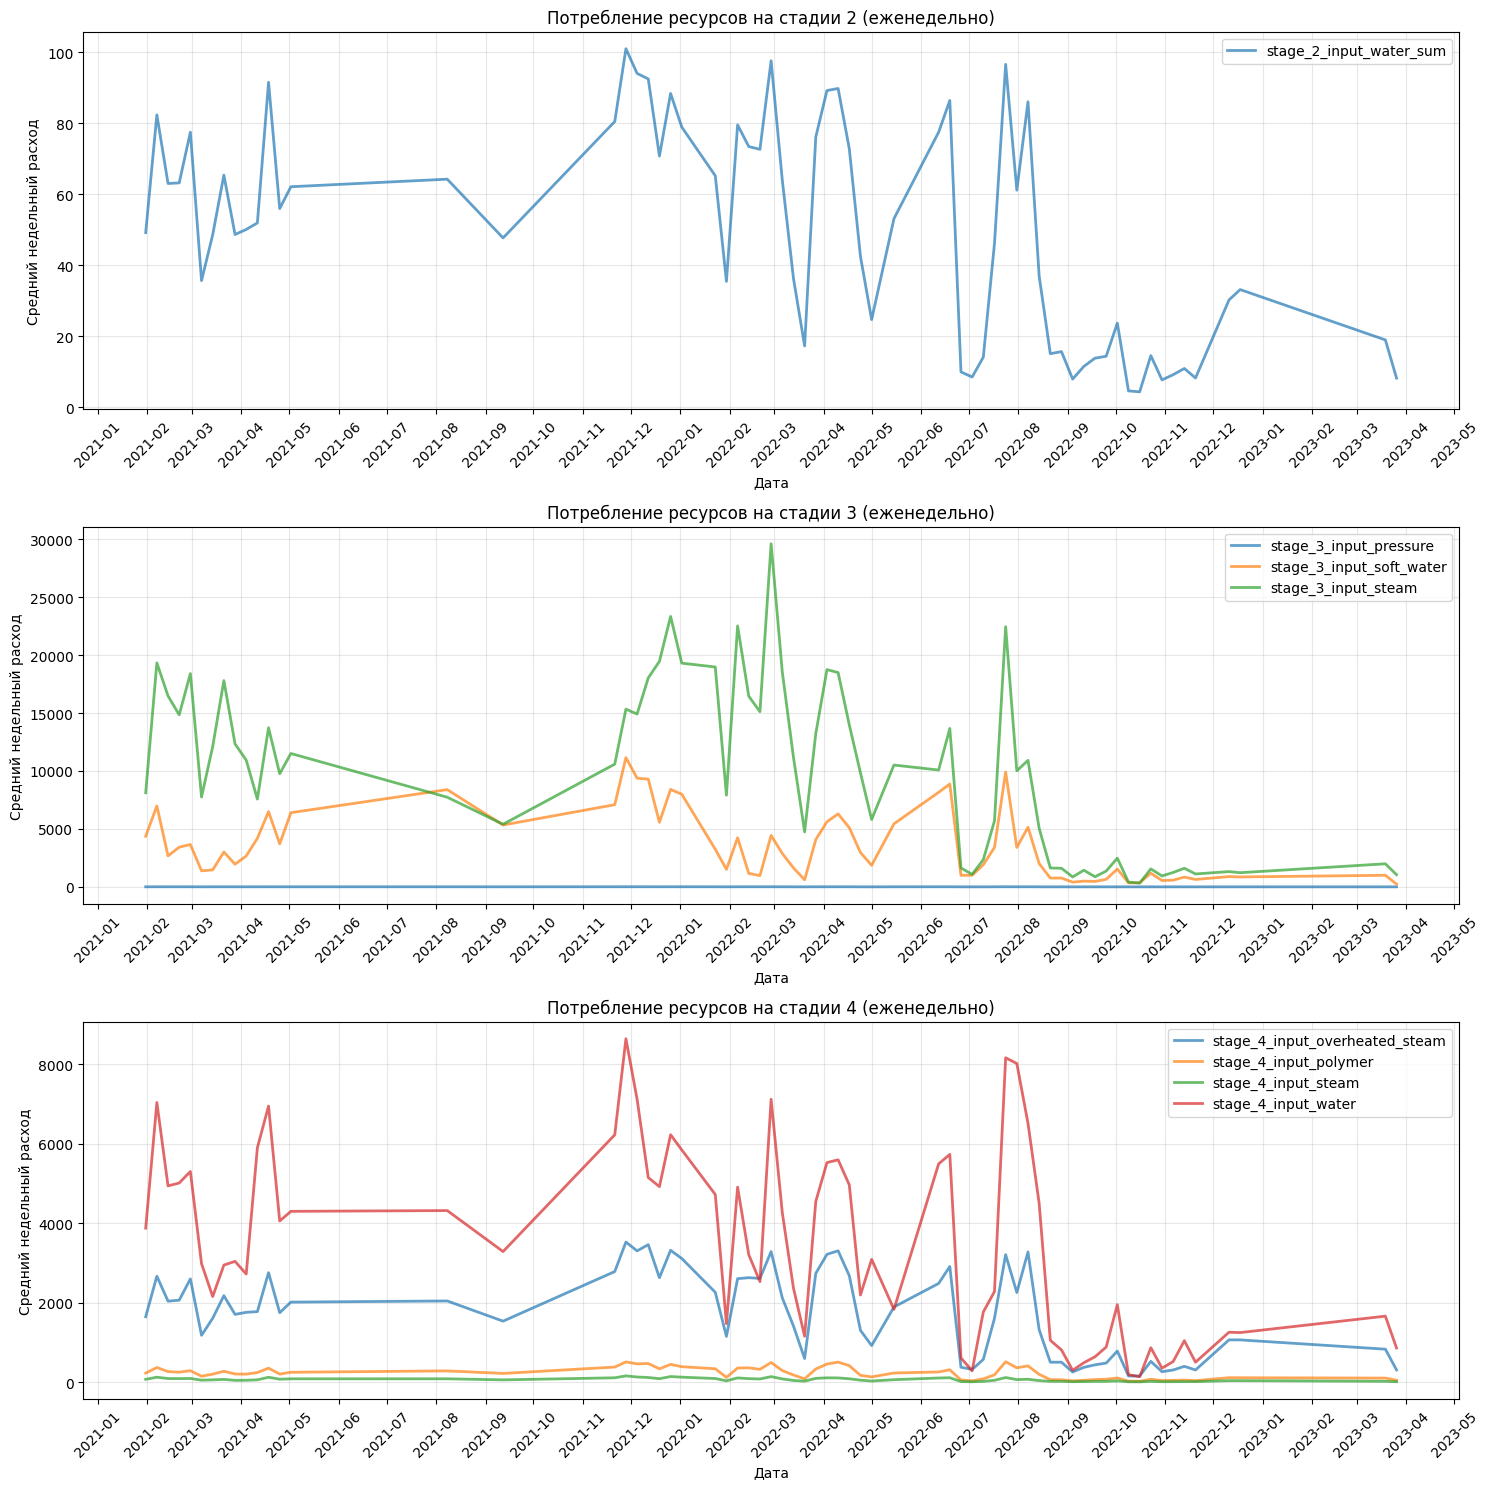


 10 дней с максимальным потреблением

stage_2:
DateTime
2021-04-15    125.566045
2021-02-14    117.627183
2021-02-13    116.925149
2021-02-07    116.883094
2021-02-06    116.876080
2021-08-07    115.406865
2021-03-18    114.449004
2021-02-24    112.345354
2021-02-23    112.147921
2022-06-12    110.833700
Name: stage_2, dtype: float64

stage_3:
DateTime
2021-02-06    48131.4245
2021-02-07    47577.5750
2021-03-18    40660.9900
2022-02-24    38460.1607
2022-07-21    37947.9957
2022-02-25    37936.9800
2021-12-14    37514.8200
2022-07-23    37272.7391
2022-07-22    37151.2300
2022-02-23    36930.1700
Name: stage_3, dtype: float64

stage_4:
DateTime
2021-04-07    17356.43345
2022-07-30    16708.27750
2022-07-31    16704.22750
2022-07-28    16657.26500
2022-08-08    15721.65840
2022-08-01    15502.29750
2022-07-23    15390.15520
2021-04-15    14495.29420
2021-02-07    14370.10220
2021-02-06    14309.14700
Name: stage_4, dtype: float64

___ Статистика ежедневного потребления ресурсов: ___



C:\Users\user\AppData\Local\Temp\ipykernel_20752\3685374072.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = daily_total.resample('M').mean()
C:\Users\user\AppData\Local\Temp\ipykernel_20752\3685374072.py:53: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_trend = monthly_avg.pct_change()


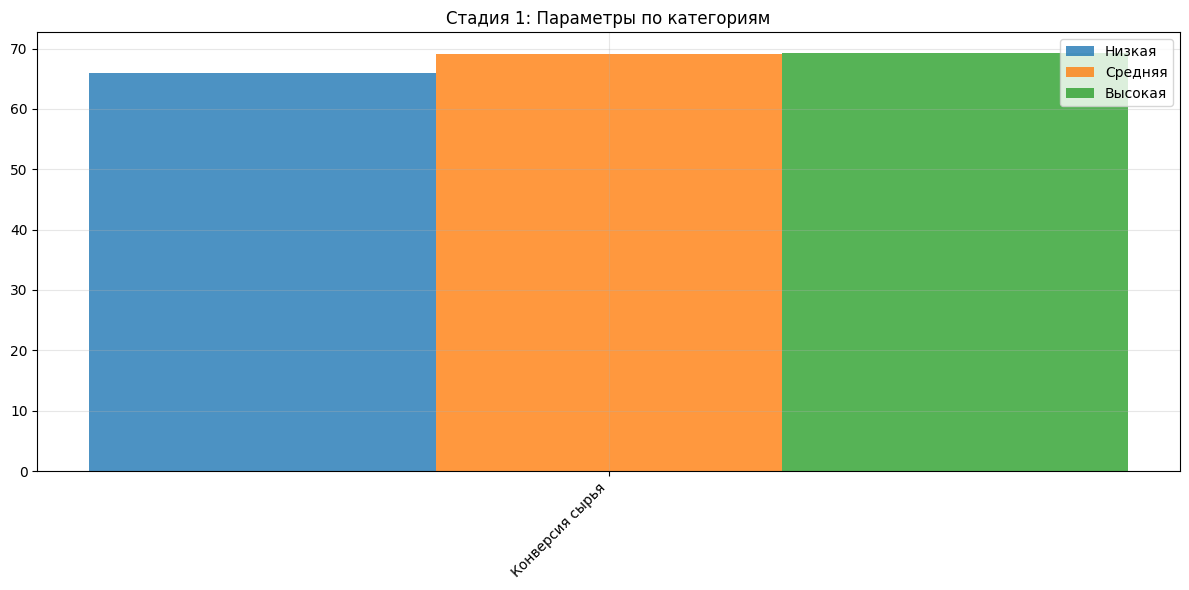


Конверсия сырья:
Низкая категория: 65.94
Средняя категория: 69.05 (изменение: 4.7%)
Высокая категория: 69.24 (изменение: 0.3%)
СТАДИЯ 2


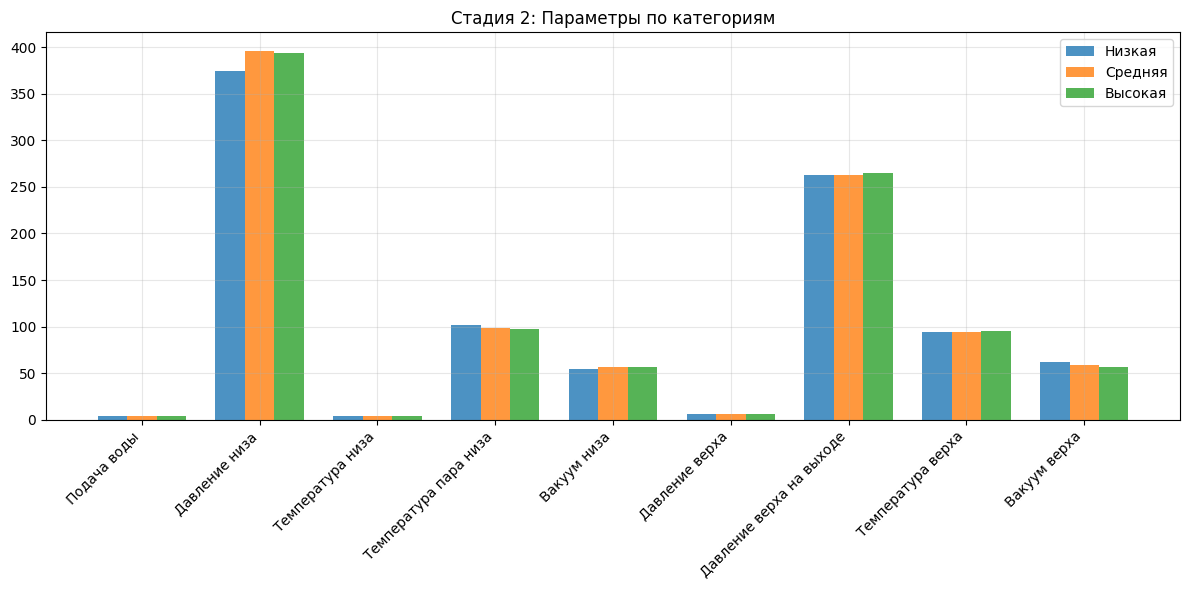


Подача воды:
Низкая категория: 4.34
Средняя категория: 4.43 (изменение: 2.1%)
Высокая категория: 4.39 (изменение: -0.9%)

Давление низа:
Низкая категория: 374.11
Средняя категория: 396.24 (изменение: 5.9%)
Высокая категория: 393.58 (изменение: -0.7%)
!!! Значимое изменение !!!

Температура низа:
Низкая категория: 4.37
Средняя категория: 4.38 (изменение: 0.2%)
Высокая категория: 4.38 (изменение: 0.0%)

Температура пара низа:
Низкая категория: 102.18
Средняя категория: 98.15 (изменение: -3.9%)
Высокая категория: 97.60 (изменение: -0.6%)

Вакуум низа:
Низкая категория: 54.06
Средняя категория: 56.59 (изменение: 4.7%)
Высокая категория: 57.10 (изменение: 0.9%)

Давление верха:
Низкая категория: 6.13
Средняя категория: 6.11 (изменение: -0.3%)
Высокая категория: 6.08 (изменение: -0.5%)

Давление верха на выходе:
Низкая категория: 263.26
Средняя категория: 262.31 (изменение: -0.4%)
Высокая категория: 264.57 (изменение: 0.9%)

Температура верха:
Низкая категория: 94.42
Средняя категория: 94.3

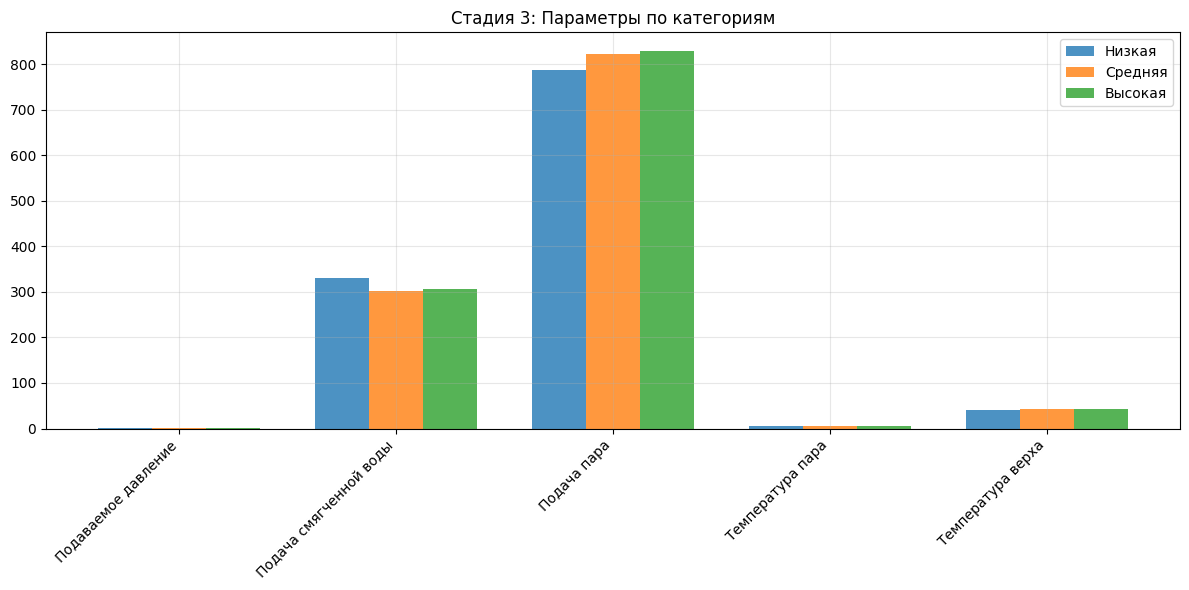


Подаваемое давление:
Низкая категория: 0.34
Средняя категория: 0.33 (изменение: -2.9%)
Высокая категория: 0.32 (изменение: -3.0%)

Подача смягченной воды:
Низкая категория: 330.61
Средняя категория: 301.47 (изменение: -8.8%)
Высокая категория: 305.65 (изменение: 1.4%)
!!! Значимое изменение !!!

Подача пара:
Низкая категория: 786.35
Средняя категория: 821.72 (изменение: 4.5%)
Высокая категория: 828.28 (изменение: 0.8%)

Температура пара:
Низкая категория: 4.70
Средняя категория: 4.70 (изменение: 0.0%)
Высокая категория: 4.71 (изменение: 0.2%)

Температура верха:
Низкая категория: 41.44
Средняя категория: 42.27 (изменение: 2.0%)
Высокая категория: 42.44 (изменение: 0.4%)
СТАДИЯ 4


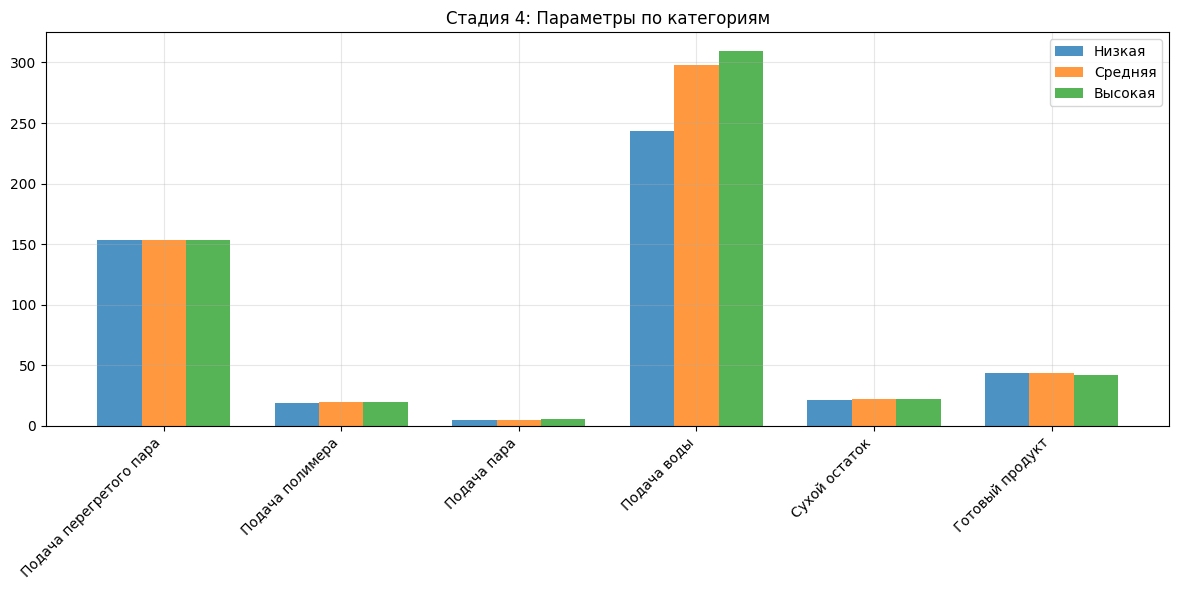


Подача перегретого пара:
Низкая категория: 153.17
Средняя категория: 153.34 (изменение: 0.1%)
Высокая категория: 153.21 (изменение: -0.1%)

Подача полимера:
Низкая категория: 18.75
Средняя категория: 20.08 (изменение: 7.1%)
Высокая категория: 20.17 (изменение: 0.4%)
!!! Значимое изменение !!!

Подача пара:
Низкая категория: 4.49
Средняя категория: 5.28 (изменение: 17.6%)
Высокая категория: 5.55 (изменение: 5.1%)
!!! Значимое изменение !!!

Подача воды:
Низкая категория: 243.76
Средняя категория: 297.95 (изменение: 22.2%)
Высокая категория: 309.39 (изменение: 3.8%)
!!! Значимое изменение !!!

Сухой остаток:
Низкая категория: 21.29
Средняя категория: 22.28 (изменение: 4.7%)
Высокая категория: 22.50 (изменение: 1.0%)

Готовый продукт:
Низкая категория: 44.03
Средняя категория: 44.07 (изменение: 0.1%)
Высокая категория: 42.10 (изменение: -4.5%)


In [36]:
%run calculations/calculations.ipynb

**Анализируя данные, можно выделить основные моменты:**

**1) Наиболее важные изменения происходят на 4-й стадии производства:**

1. Подача воды увеличивается (+28%)! при средней опасности
2. Подача пара возрастает на 18%
3. Подача полимера повышается на 7%
4. Количество готового продукта падает на 4% при высокой опасности производства!!!


**2) На 2 стадии:**

1. Подача воды увеличивается на 11%
2. Давление низа возрастает на 6%
3. Немножко снижается вакуум верха (-4.0% и -4.5%)


**3) На 3 стадии:**

1. Подача смягченной воды снижается на 9.1%


**4) На 1-й стадии изменения самые незначительные:**

1. Конверсия сырья увеличивается на 4.7%

**Промежуточный вывод таков:** наибольшее влияние на опасность газа оказывает повышенная подача воды и пара на 4-й стадии. При этом эффективность производства падает (меньше готового продукта).

## Проверка гипотез

Проверка гипотезы 1:
Если ли различия в доле опасного газа от смены?

Основные статистические характеристики:
Смена 1:
  Среднее значение = 0.1407
  Медиана = 0.1400
  Стандартное отклонение = 0.0391
  Размер выборки = 475

Смена 2:
  Среднее значение = 0.1395
  Медиана = 0.1400
  Стандартное отклонение = 0.0381
  Размер выборки = 459

Проверка нормальности распределения:
Тест Шапиро-Уилка: W-статистика = 0.9736, p-значение = 1.47e-07
Тест Шапиро-Уилка: W-статистика = 0.9840, p-значение = 5.92e-05

Проверка гипотез:
Mann-Whitney U Test:
  U-статистика: 110984.0000, p-значение: 0.6314
  Результат: Статистически значимых различий между сменами нет.


########################################################################################################################


Проверка гипотезы 2:
Какая из смен лучше управляет температурой верха на этапе 3? Считать, что высокая температура хуже.

Основные статистические характеристики температуры на этапе 3:
Смена 1:
  Среднее значение = 42.72

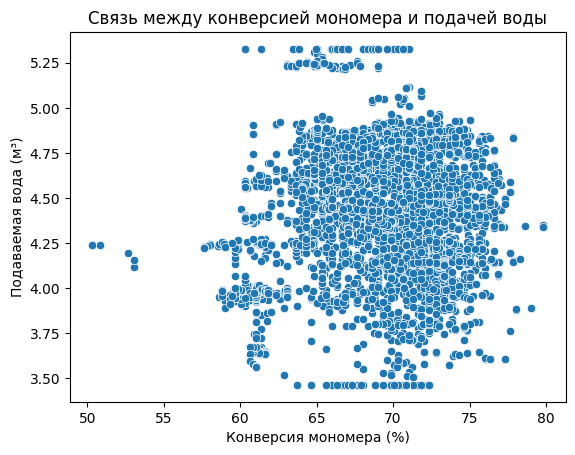



########################################################################################################################


Проверка гипотезы 4:
Количество выходного количества продукта связано с долей опасного газа.

Проверка нормальности распределения:
Доля опасного газа:
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.41e-10
Выход продукта:
Тест Шапиро-Уилка: W-статистика = 0.9617, p-значение = 6.35e-15

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент корреляции (Спирмена): -0.0517
p-значение: 1.1429e-01
Не удается отклонить нулевую гипотезу: Значимой связи между долей опасного газа и количеством выходного продукта нет.

Визуализация корреляции:


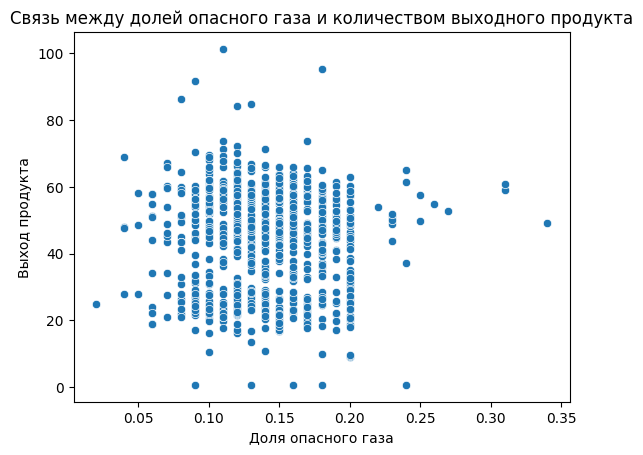



########################################################################################################################


Проверка гипотезы 5:
Входной полимер на этапе 4 влияет на количество выходного продукта на этапе 4.

Проверка нормальности распределения:
Количество полимера на входе:
Тест Шапиро-Уилка: W-статистика = 0.9792, p-значение = 1.86e-24
Выход продукта:
Тест Шапиро-Уилка: W-статистика = 0.9625, p-значение = 7.99e-32

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент корреляции (Спирмена): 0.1436
p-значение: 5.6914e-21
Отклоняем нулевую гипотезу: Есть значимая связь между количеством полимера на входе и количеством выходного продукта.
Связь слабая.

Визуализация корреляции:


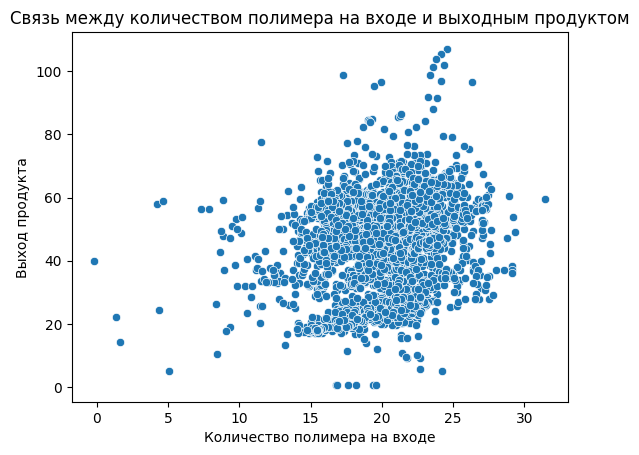



########################################################################################################################


Проверка гипотезы 6:
Вакуум низа на этапе 2 влияет на количество выходного продукта на этапе 4.

Проверка нормальности распределения:
Вакуум на 2 этапе:
Тест Шапиро-Уилка: W-статистика = 0.9481, p-значение = 2.63e-36
Продукт на 4 этапе:
Тест Шапиро-Уилка: W-статистика = 0.9625, p-значение = 7.99e-32

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент корреляции (Спирмена): -0.0034
p-значение: 8.2476e-01
Не удается отклонить нулевую гипотезу: Значимой связи между вакуумом на 2 этапе и продуктом на 4 этапе нет.

Визуализация корреляции:


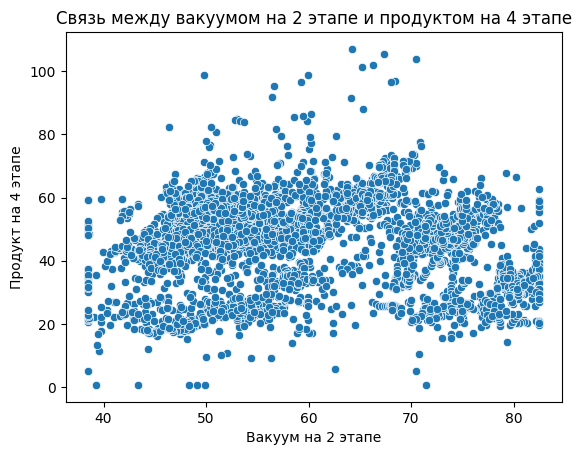



########################################################################################################################


Проверка гипотезы 7:
Среднее содержание сухого остатка на этапе 4 зависит от температуры на верху на этапе 3.

Проверка нормальности распределения:
Температура верха на 3 этапе:
Тест Шапиро-Уилка: W-статистика = 0.8704, p-значение = 1.33e-50
Средний остаток на 4 этапе:
Тест Шапиро-Уилка: W-статистика = 0.9799, p-значение = 4.56e-24

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент корреляции (Спирмена): 0.1965
p-значение: 3.5151e-38
Отклоняем нулевую гипотезу: Есть значимая связь между температурой верха на 3 этапе и средним остатком на 4 этапе.
Связь слабая.

Визуализация корреляции:


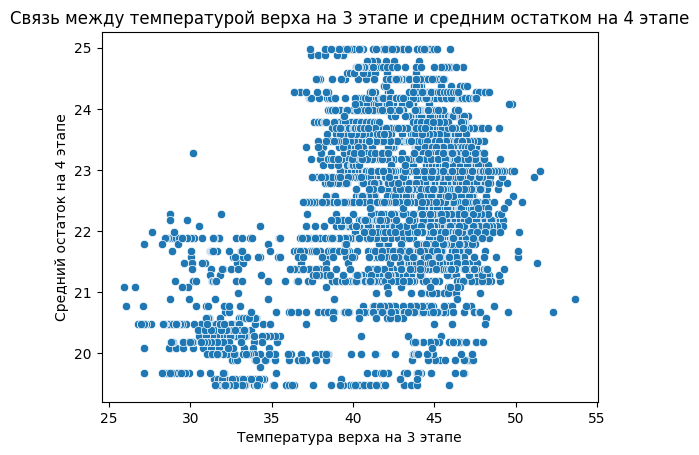

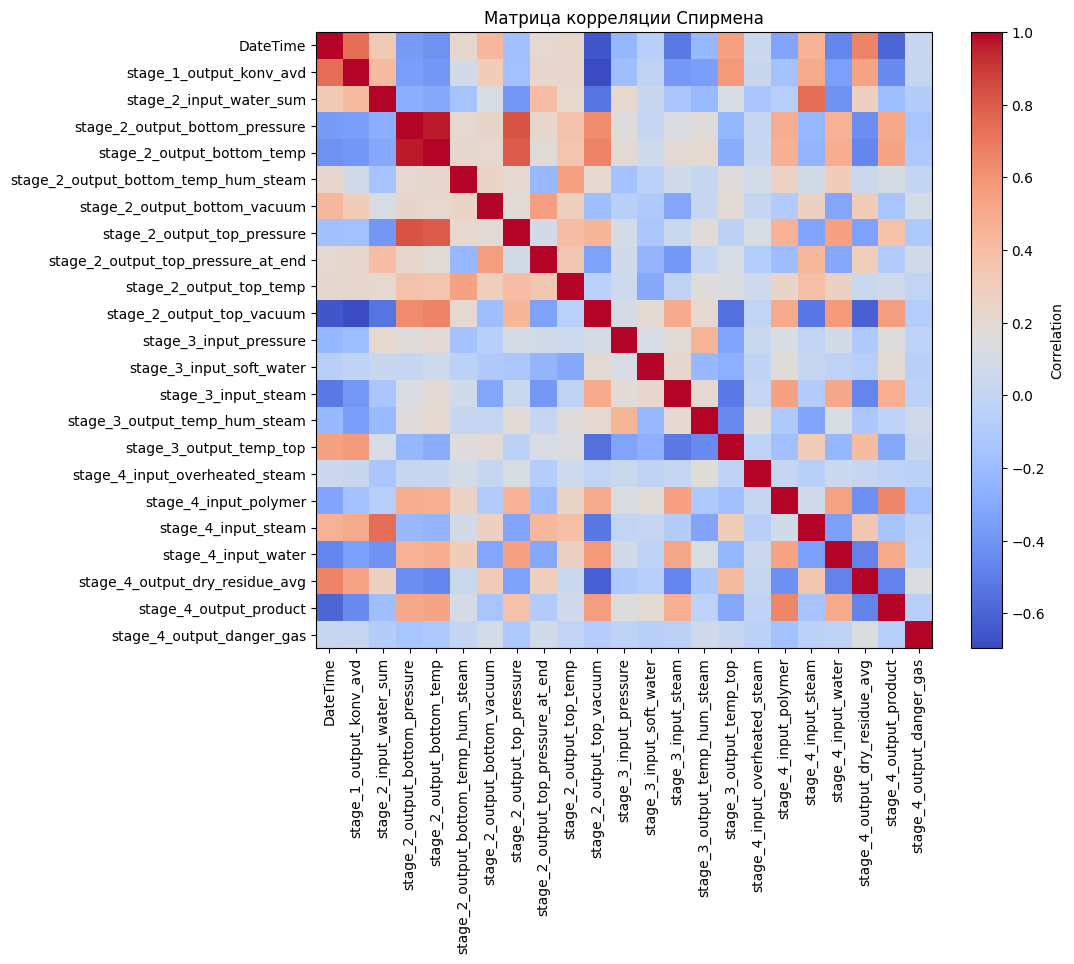

In [37]:
%run hypothesis_testing/hypothesis_testing.ipynb

## Регрессионное моделирование

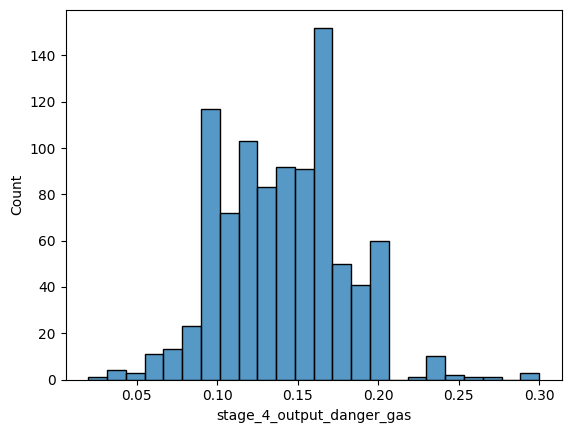

Показатели модели SVR: 
Лучшая пара метрик: R2 = -0.0590, MAPE = 0.2815
Метрики оценены на основе следующих факторов: ['stage_2_input_water_sum', 'stage_2_output_top_pressure', 'stage_2_output_top_temp', 'stage_2_output_top_vacuum', 'stage_3_input_pressure', 'stage_3_input_soft_water', 'stage_3_output_temp_hum_steam', 'stage_3_output_temp_top', 'stage_4_input_overheated_steam', 'stage_4_output_dry_residue_avg', 'stage_4_output_product', 'work_shift']
=-----------------------------------------------
Показатели модели Decision Tree Regressor: 
Лучшая пара метрик: R2 = 0.1197, MAPE = 0.2185
Метрики оценены на основе следующих факторов: ['DateTime']
=-----------------------------------------------
Показатели модели Gradient Boosting Regressor: 
Лучшая пара метрик: R2 = 0.3425, MAPE = 0.1953
Метрики оценены на основе следующих факторов: ['stage_2_input_water_sum', 'stage_2_output_bottom_pressure', 'stage_2_output_bottom_temp_hum_steam', 'stage_2_output_top_pressure', 'stage_2_output_top_pre

In [38]:
%run regression_modeling/danger_gas_prediction_model.ipynb

## Выводы:

### Оценка метрик: **R2 = 0.3932 и MAPE = 0.1887**. Модель Random Forest Regressor.

#### **Неудовлетворительная прогностическая способность модели**: Проведенный анализ показал, что среди протестированных моделей наилучшие результаты достигнуты с помощью Random Forest Regressor (RFR), однако даже эта модель не продемонстрировала удовлетворительной прогностической способности в отношении доли опасного газа. Остальные модели, включая SVR, Decision Tree Regressor, Gradient Boosting Regressor, K-Nearest Neighbors Regressor (с n_neighbors = 5 и 3), показали худшие результаты. Несмотря на то, что RFR показал лучшие метрики (R2 = 0.3932 и MAPE = 0.1887), они по-прежнему свидетельствуют о том, что модель объясняет лишь небольшую долю дисперсии целевой переменной, а предсказания имеют значительные отклонения от фактических значений. Таким образом, RFR является лучшим выбором из рассмотренных моделей, но его прогностическая сила остается недостаточной.

#### **Недопустимость замены ручных замеров на основе текущей модели**: Принимая во внимание низкие показатели прогностической точности модели и существенную величину погрешности предсказаний, её использование в качестве замены ручных замеров доли опасного газа является недопустимым. Ошибки в предсказаниях, достигающие в среднем 19%, могут иметь критические последствия, особенно в контексте мониторинга потенциально опасных веществ. Таким образом, текущая модель не обеспечивает требуемой надежности и точности для принятия ответственных решений.